In [1]:
from collections import Counter
import re

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from nltk import word_tokenize
from nltk.corpus import stopwords

from wordcloud import WordCloud

import unidecode

In [10]:
df_salary=pd.read_csv("../df_annually.csv")

In [11]:
X = df_salary.salary_mean.to_numpy().reshape(-1,1)

In [12]:
df_salary.salary_mean.nunique()

88

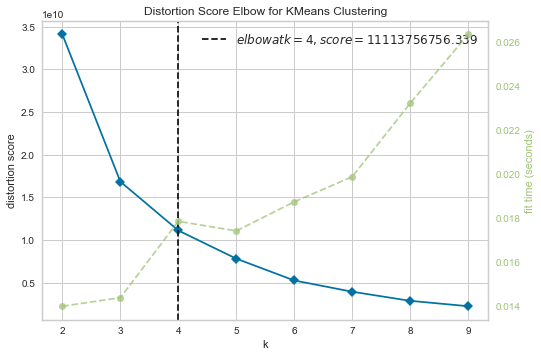

In [13]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

#Instantiate the clustering model and visualizer

model = KMeans(init = 'k-means++')
visualizer = KElbowVisualizer(model, k=range(2,10))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.poof()        # Draw/show/poof the data

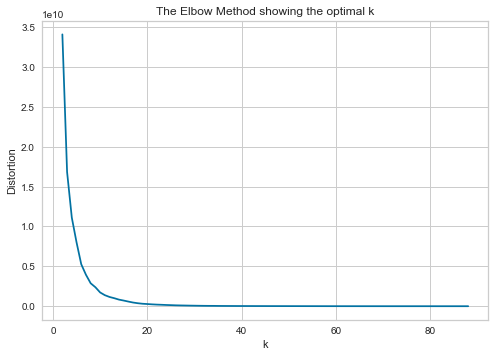

In [14]:
# clustering dataset
# determine k using elbow method
# k means determine K
# K = nombre de clusters à déterminer
inertias = []
K = range(2,89) 

for k in K:
    kmeanModel = KMeans(init = 'k-means++', n_clusters=k)
    kmeanModel.fit(X) #calcule l'inertie intra-classe, labellise
    inertias.append(kmeanModel.inertia_) #on récupère que l'inertie

# Plot the elbow
plt.plot(K, inertias, 'bx-') #'bx-' : style de ligne
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [15]:
print(inertias)

[34082331397.575832, 16831013449.639847, 11113756756.339123, 8020866236.128584, 5264749519.4390955, 3941007128.6266003, 2874193236.8912907, 2379739074.3428392, 1727079194.3207188, 1383752972.1152303, 1157575523.813387, 1003970015.5121065, 826385323.9996512, 708709711.377089, 579856427.8019224, 459634545.2128391, 373425674.704443, 308612228.7995906, 272733938.8722782, 233137635.61352298, 202237901.17530367, 180544686.92437196, 154802396.84844708, 134804999.12608147, 112625747.24422136, 98802223.21097533, 87457089.50112966, 76549856.97068152, 67018252.063227944, 57719205.829273485, 49737996.686830655, 44577447.71783218, 43071463.543250635, 36269007.69041704, 32406294.665206954, 29640938.876882434, 27827185.61540336, 24777248.26038955, 23186842.498008303, 21349594.428399317, 21317827.144075118, 18121825.250387266, 18289912.949296974, 16646966.875573933, 14942694.488690913, 14003638.088504173, 13753440.665632129, 12595231.090984553, 11725582.05938432, 10796035.08984001, 9955545.404131029, 

In [16]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

for n_cluster in range(2, 88):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.589181790850132
For n_clusters=3, The Silhouette Coefficient is 0.5686827587956835
For n_clusters=4, The Silhouette Coefficient is 0.5488174152168613
For n_clusters=5, The Silhouette Coefficient is 0.5503265987675587
For n_clusters=6, The Silhouette Coefficient is 0.5700936975699933
For n_clusters=7, The Silhouette Coefficient is 0.5626137981782657
For n_clusters=8, The Silhouette Coefficient is 0.5771025153345063
For n_clusters=9, The Silhouette Coefficient is 0.6031085858116941
For n_clusters=10, The Silhouette Coefficient is 0.6156621947176251
For n_clusters=11, The Silhouette Coefficient is 0.6088552795737979
For n_clusters=12, The Silhouette Coefficient is 0.6191499395823507
For n_clusters=13, The Silhouette Coefficient is 0.6383163225903056
For n_clusters=14, The Silhouette Coefficient is 0.6319340713803585
For n_clusters=15, The Silhouette Coefficient is 0.6903002191593055
For n_clusters=16, The Silhouette Coefficient is 0.726636